This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

# Let's see how "Quality" of Data Matters

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
%%time
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255


train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

CPU times: user 3.45 s, sys: 1.05 s, total: 4.51 s
Wall time: 7.34 s


In [3]:
train_images.shape

(60000, 784)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.93069565, 0.96084172,
       0.22218552])

In [6]:
train_images_with_zeros_channels.shape

(60000, 1568)

In [7]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [8]:
%%time

NEPOCHS = 5
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=NEPOCHS,
    batch_size=128,
    validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 7s 4ms/step - loss: 0.2955 - accuracy: 0.9138 - val_loss: 0.1611 - val_accuracy: 0.9552
Epoch 2/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.9643 - val_loss: 0.1048 - val_accuracy: 0.9689
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0801 - accuracy: 0.9772 - val_loss: 0.0848 - val_accuracy: 0.9733
Epoch 4/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.0904 - val_accuracy: 0.9713
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0423 - accuracy: 0.9877 - val_loss: 0.0771 - val_accuracy: 0.9758
Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.6137 - accuracy: 0.8130 - val_loss: 0.3184 - val_accuracy: 0.9010
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.2582 - accuracy: 0.9203 - val_loss: 0.1916 - val_accuracy: 0.9430
Epoch 3/5
375

**Plotting a validation accuracy comparison**

CPU times: user 33.9 ms, sys: 400 µs, total: 34.3 ms
Wall time: 38.5 ms


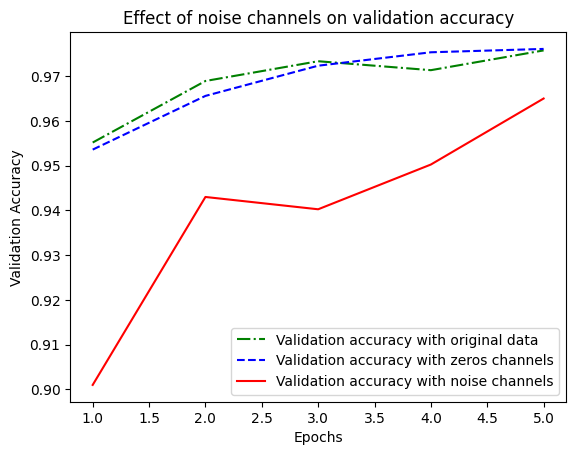

In [9]:
%%time
import matplotlib.pyplot as plt
val_acc_orig = history.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, (NEPOCHS+1))

plt.plot(epochs, val_acc_orig, "g-.",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_noise, "r-",
         label="Validation accuracy with noise channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [10]:
%%time

NEPS = 25
BATCH_SZ = 512

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=NEPS,
          batch_size=BATCH_SZ,
          validation_split=0.2)

Epoch 1/25
94/94 [==============================] - 2s 8ms/step - loss: 2.3179 - accuracy: 0.1025 - val_loss: 2.3077 - val_accuracy: 0.1025
Epoch 2/25
94/94 [==============================] - 0s 5ms/step - loss: 2.2961 - accuracy: 0.1204 - val_loss: 2.3148 - val_accuracy: 0.0975
Epoch 3/25
94/94 [==============================] - 0s 5ms/step - loss: 2.2858 - accuracy: 0.1299 - val_loss: 2.3132 - val_accuracy: 0.1037
Epoch 4/25
94/94 [==============================] - 1s 6ms/step - loss: 2.2733 - accuracy: 0.1444 - val_loss: 2.3200 - val_accuracy: 0.1018
Epoch 5/25
94/94 [==============================] - 0s 5ms/step - loss: 2.2612 - accuracy: 0.1565 - val_loss: 2.3275 - val_accuracy: 0.1024
Epoch 6/25
94/94 [==============================] - 1s 6ms/step - loss: 2.2474 - accuracy: 0.1667 - val_loss: 2.3346 - val_accuracy: 0.1066
Epoch 7/25
94/94 [==============================] - 0s 5ms/step - loss: 2.2317 - accuracy: 0.1770 - val_loss: 2.3364 - val_accuracy: 0.1037
Epoch 8/25
94/94 [==

In [11]:
%%time
val_acc = history.history["val_accuracy"]
print(len(val_acc))


val_loss = history.history["val_loss"]
print(len(val_loss))

val_loss
# history.history

25
25
CPU times: user 134 µs, sys: 20 µs, total: 154 µs
Wall time: 138 µs


[2.307742118835449,
 2.314800262451172,
 2.313228130340576,
 2.319981813430786,
 2.3275327682495117,
 2.3346049785614014,
 2.3364346027374268,
 2.3480770587921143,
 2.3572804927825928,
 2.366821527481079,
 2.3731563091278076,
 2.379866600036621,
 2.3978283405303955,
 2.4164154529571533,
 2.43099045753479,
 2.4451804161071777,
 2.4600257873535156,
 2.479468822479248,
 2.4856154918670654,
 2.5058093070983887,
 2.5185744762420654,
 2.566925525665283,
 2.5576980113983154,
 2.579326868057251,
 2.6081459522247314]

CPU times: user 24.7 ms, sys: 0 ns, total: 24.7 ms
Wall time: 28.6 ms


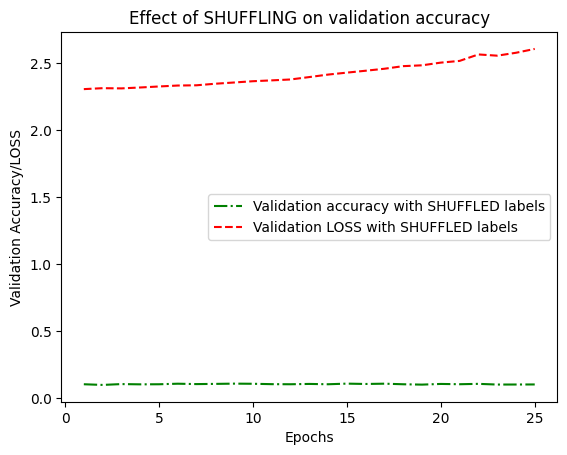

In [12]:
%%time
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
epochs = range(1, (NEPS+1))

plt.plot(epochs, val_acc, "g-.",
         label="Validation accuracy with SHUFFLED labels")
plt.plot(epochs, val_loss, "r--",
         label="Validation LOSS with SHUFFLED labels")
plt.title("Effect of SHUFFLING on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy/LOSS")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## 5.3 Improving model fit

Keep an eye out for the following when you’re choosing an evaluation protocol:

Data representativeness—You want both your training set and test set to be representative of the data at hand. For instance, if you’re trying to classify images of digits, and you’re starting from an array of samples where the samples are ordered by their class, taking the first 80% of the array as your training set and the remaining 20% as your test set will result in your training set containing only classes 0–7, whereas your test set will contain only classes 8–9. This seems like a ridiculous mistake, but it’s surprisingly common. For this reason, you usually should randomly shuffle your data before splitting it into training and test sets.

The arrow of time—If you’re trying to predict the future given the past (for example, tomorrow’s weather, stock movements, and so on), you should not randomly shuffle your data before splitting it, because doing so will create a temporal leak: your model will effectively be trained on data from the future. In such situations, you should always make sure all data in your test set is posterior to the data in the training set.

Redundancy in your data—If some data points in your data appear twice (fairly common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, you’ll be testing on part of your training data, which is the worst thing you can do! Make sure your training set and validation set are disjoint.

Having a reliable way to evaluate the performance of your model is how you’ll be able to monitor the tension at the heart of machine learning—between optimization and generalization, underfitting and overfitting.

### Possible issues:

* Training doesn’t get started: your training loss doesn’t go down over time.
* Training gets started just fine, but your model doesn’t meaningfully generalize: you can’t beat the common-sense baseline you set.
* Training and validation loss both go down over time, and you can beat your baseline, but you don’t seem to be able to overfit, which indicates you’re still underfitting.


### 5.3.1 Tuning key gradient descent parameters

Training a MNIST model with an
* incorrectly high learning rate = 1.0 and
* LR=0.01

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 615.4916 - accuracy: 0.3277 - val_loss: 2.3137 - val_accuracy: 0.2079
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.0432 - accuracy: 0.2313 - val_loss: 2.4129 - val_accuracy: 0.1334
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5440 - accuracy: 0.1815 - val_loss: 2.2310 - val_accuracy: 0.1734
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4400 - accuracy: 0.1888 - val_loss: 2.2734 - val_accuracy: 0.1963
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4942 - accuracy: 0.1831 - val_loss: 2.5039 - val_accuracy: 0.1221
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5002 - accuracy: 0.1639 - val_loss: 2.3336 - val_accuracy: 0.1462
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3196 - accuracy: 0.1643 - val_loss: 2.1849 - val_accuracy: 0.2023
Epoc

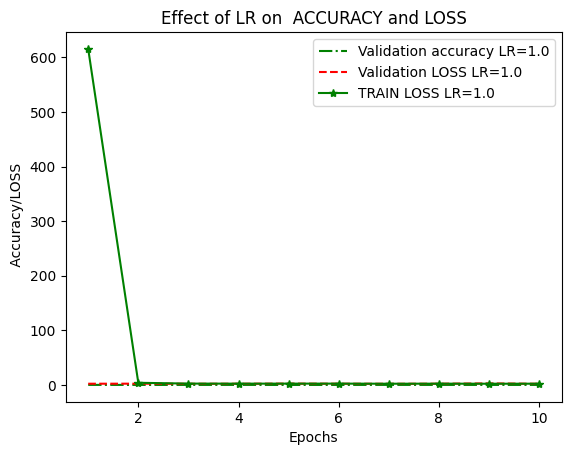

In [22]:
%%time
NEPS=10
LR=1.0
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(LR),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels,
          epochs=NEPS,
          batch_size=128,
          validation_split=0.2)


# %%time
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
train_loss = history.history["loss"]

epochs = range(1, (NEPS+1))

plt.plot(epochs, val_acc, "g-.", label=f"Validation accuracy LR={LR}")
plt.plot(epochs, val_loss, "r--", label=f"Validation LOSS LR={LR}")
plt.plot(epochs, train_loss, "g-*", label=f"TRAIN LOSS LR={LR}")
plt.title("Effect of LR on  ACCURACY and LOSS")
plt.xlabel("Epochs")
plt.ylabel(" Accuracy/LOSS")
plt.legend()

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.2910 - accuracy: 0.9167 - val_loss: 0.1480 - val_accuracy: 0.9597
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1204 - accuracy: 0.9649 - val_loss: 0.1037 - val_accuracy: 0.9692
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9765 - val_loss: 0.0900 - val_accuracy: 0.9722
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9836 - val_loss: 0.0847 - val_accuracy: 0.9745
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0430 - accuracy: 0.9878 - val_loss: 0.0758 - val_accuracy: 0.9772
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.9931 - val_loss: 0.0733 - val_accuracy: 0.9786
Epoch 

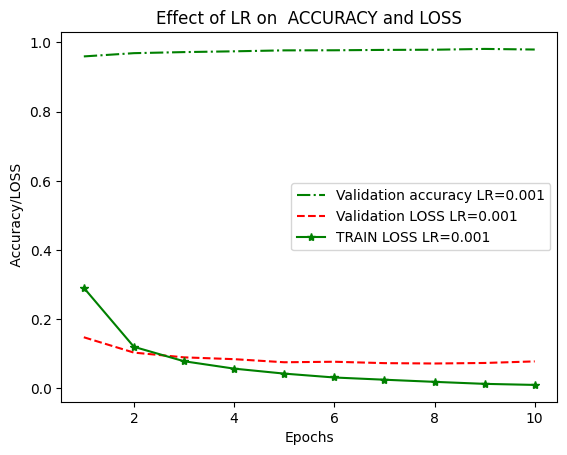

In [23]:
%%time
NEPS=10
LR=0.001
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(LR),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels,
          epochs=NEPS,
          batch_size=128,
          validation_split=0.2)


# %%time
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
train_loss = history.history["loss"]

epochs = range(1, (NEPS+1))

plt.plot(epochs, val_acc, "g-.", label=f"Validation accuracy LR={LR}")
plt.plot(epochs, val_loss, "r--", label=f"Validation LOSS LR={LR}")
plt.plot(epochs, train_loss, "g-*", label=f"TRAIN LOSS LR={LR}")
plt.title("Effect of LR on  ACCURACY and LOSS")
plt.xlabel("Epochs")
plt.ylabel(" Accuracy/LOSS")
plt.legend()

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2916 - accuracy: 0.9152 - val_loss: 0.1452 - val_accuracy: 0.9581
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1219 - accuracy: 0.9639 - val_loss: 0.1040 - val_accuracy: 0.9687
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0794 - accuracy: 0.9762 - val_loss: 0.0852 - val_accuracy: 0.9755
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9835 - val_loss: 0.0810 - val_accuracy: 0.9755
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0762 - val_accuracy: 0.9773
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0323 - accuracy: 0.9910 - val_loss: 0.0719 - val_accuracy: 0.9785
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0250 - accuracy: 0.9928 - val_loss: 0.0723 - val_accuracy: 0.9788
Epoch 

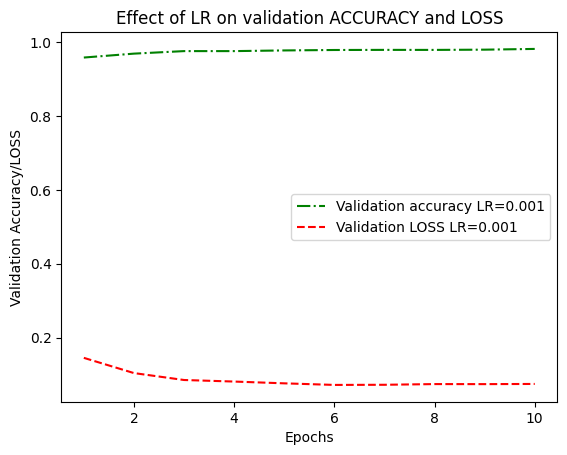

In [21]:
%%time
NEPS=10
LR=0.001
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(LR),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels,
          epochs=NEPS,
          batch_size=128,
          validation_split=0.2)


# %%time
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
epochs = range(1, (NEPS+1))

plt.plot(epochs, val_acc, "g-.", label=f"Validation accuracy LR={LR}")
plt.plot(epochs, val_loss, "r--", label=f"Validation LOSS LR={LR}")
plt.title("Effect of LR on validation ACCURACY and LOSS")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy/LOSS")
plt.legend()

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
%%time
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
model.summary()

In [ ]:
model.weights

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity (7850 pars) on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
%%time
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt
val_loss_small = history_small_model.history["val_loss"]
val_loss_big = history_large_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_small, "b--", label="Validation loss for SMALL Capacity (7850 pars) model")
plt.plot(epochs, val_loss_big, "r--", label="Validation loss LARGE Cap (85642 pars) model")
plt.title("Effect of capacity  on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
%%time
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
%%time
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
%%time
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
%%time
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
%%time
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary

# CALL BACK FNC

In [26]:
# https://saturncloud.io/blog/how-to-show-tensorflow-model-output-every-x-epochs/

from tensorflow.keras.callbacks import Callback

class ShowOutputCallback(Callback):
    def __init__(self, interval=10):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.interval == 0:
            print(f"Epoch {epoch + 1}:")
            for key, value in logs.items():
                print(f"{key}: {value:.4f}")
            print()

In [33]:
%%time
NEPS=100
LR=0.001
LR=1.0
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(LR),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# callbacks=[ShowOutputCallback(interval=10)]
# model.fit(x_train, y_train, epochs=100, callbacks=[ShowOutputCallback(interval=10)])

history = model.fit(train_images, train_labels,
          epochs=NEPS,
          batch_size=128,
          validation_split=0.2,
          verbose=0,
          callbacks=[ShowOutputCallback(interval=20)])


Epoch 1:
loss: 659.2978
accuracy: 0.2778
val_loss: 2.1222
val_accuracy: 0.2305

Epoch 21:
loss: 2.2458
accuracy: 0.1947
val_loss: 2.1641
val_accuracy: 0.1959

Epoch 41:
loss: 2.1958
accuracy: 0.1962
val_loss: 2.2839
val_accuracy: 0.1941

Epoch 61:
loss: 2.1468
accuracy: 0.2017
val_loss: 2.1899
val_accuracy: 0.1873

Epoch 81:
loss: 2.1318
accuracy: 0.2029
val_loss: 2.2654
val_accuracy: 0.1948

CPU times: user 2min, sys: 8.21 s, total: 2min 9s
Wall time: 1min 55s


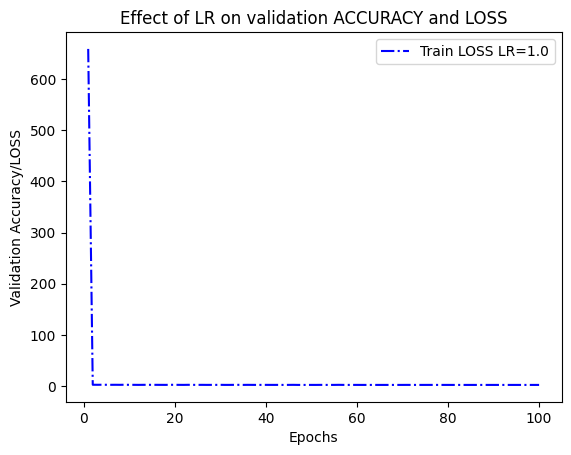

In [42]:
# %%time
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
train_loss = history.history["loss"]
epochs = range(1, (NEPS+1))

plt.plot(epochs, train_loss, "b-.", label=f"Train LOSS LR={LR}")
# plt.plot(epochs[45:], train_loss[45:], "b-.", label=f"Train LOSS LR={LR}")
# plt.plot(epochs, val_acc, "g-.", label=f"Validation accuracy LR={LR}")
# plt.plot(epochs, val_loss, "r--", label=f"Validation LOSS LR={LR}")
plt.title("Effect of LR on validation ACCURACY and LOSS")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy/LOSS")
plt.legend()